* Run Iris case
* Plot the accuracy as a function of K ( for K= 1, 5,9,13,and 19 ONLY) ( calculate the accuracy for different K, then plot accuracy as a function of K)
* Submit:
    * source code AND 
    * the accuracy graph on BB

* Which K gives highest accuracy?


### K=1

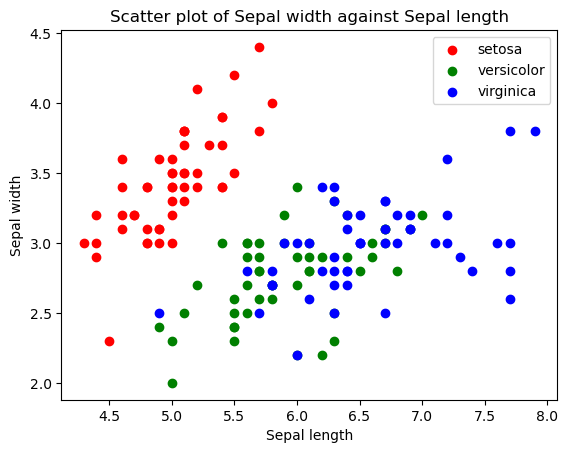

In [ ]:
%matplotlib inline
#import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris.data[:, :2] # take the first two features
y = iris.target

#---plot the points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

(array([0, 1, 2]), array([50, 56, 44]))


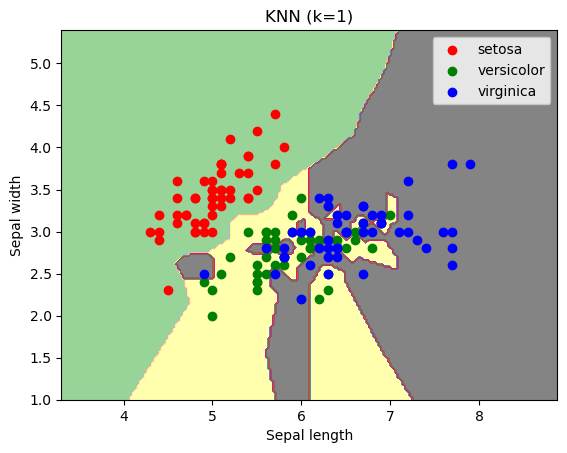

In [23]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
#---instantiate learning model---
knn = KNeighborsClassifier(n_neighbors=k)
#---fitting the model---
knn.fit(X, y)
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#---step size in the mesh---
h = (x_max / x_min)/100
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)
predictions = knn.predict(X)
#--classifications based on predictions---
print(np.unique(predictions, return_counts=True))

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN model
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy using accuracy_score
accuracy1 = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the KNN model (k={k}): {accuracy1 * 100:.2f}%")

Accuracy of the KNN model (k=1): 71.11%


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy using accuracy_score
accuracy2 = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the KNN model (k={k}): {accuracy2 * 100:.2f}%")

Accuracy of the KNN model (k=5): 77.78%


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN model
k = 9
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy using accuracy_score
accuracy3 = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the KNN model (k={k}): {accuracy3 * 100:.2f}%")

Accuracy of the KNN model (k=9): 80.00%


In [34]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN model
k = 13
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy using accuracy_score
accuracy4 = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the KNN model (k={k}): {accuracy4 * 100:.2f}%")

Accuracy of the KNN model (k=13): 73.33%


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN model
k = 19
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy using accuracy_score
accuracy5 = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the KNN model (k={k}): {accuracy5 * 100:.2f}%")

Accuracy of the KNN model (k=19): 77.78%


### Plotting Accuracy for different K values

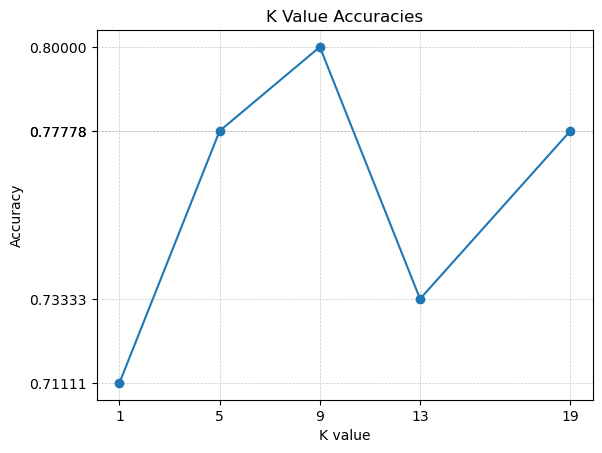

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

Accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
K = [1, 5, 9, 13, 19]

plt.plot(K, Accuracies,marker="o")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K Value Accuracies")

plt.xticks(K) #using the k values as x asis
plt.yticks(Accuracies) #Usinf the acurracy vals as the y axis

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

### RESULTS

### The KNN model with k set = to 9 produced the highest Accuracy